In [1]:
import optuna
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Optuna を用いた最適化

In [2]:
fruits_data = {
    'mango': {
        'cost': 129.168,
        'calories': 61,
        'protein': 0.5,
        'fat': 0,
        'carbs': 14.2,
        'fiber': 0.9,
        'salt': 0.0
    },
    'blueberries': {
        'cost': 200.16,
        'calories': 54.666666666666664,
        'protein': 0.5333333333333333,
        'fat': 0,
        'carbs': 12.0,
        'fiber': 2.3333333333333335,
        'salt': 0.0
    },
    'strawberries': {
        'cost': 185.76,
        'calories': 34,
        'protein': 0.9,
        'fat': 0.1,
        'carbs': 7.1,
        'fiber': 1.4,
        'salt': 0.0
    },
    'pineapple': {
        'cost': 142.56,
        'calories': 56.666666666666664,
        'protein': 0.6,
        'fat': 0,
        'carbs': 13.0,
        'fiber': 1.2,
        'salt': 0.0
    }
}

n_trials = 1000

# Protein vs Dietary fiber

In [3]:
# 目的関数の定義
def objective_protein_calories(trial):
    # 各フルーツの重量を提案
    weights = {
        'mango': trial.suggest_int('mango', 0, 50),
        'blueberries': trial.suggest_int('blueberries', 0, 50),
        'strawberries': trial.suggest_int('strawberries', 0, 50),
        'pineapple': trial.suggest_int('pineapple', 0, 50)
    }
    
    # 合計コストとカロリーを計算
    total_protein = sum(weights[fruit] * fruits_data[fruit]['protein'] for fruit in weights) / 100
    total_dietary_fiber = sum(weights[fruit] * fruits_data[fruit]['fiber'] for fruit in weights) / 100
    
    return total_protein, total_dietary_fiber

In [4]:
# Optuna による多目的最適化
study = optuna.create_study(directions=['maximize', 'maximize'])
study.optimize(objective_protein_calories, n_trials)

[I 2024-04-29 02:23:18,164] A new study created in memory with name: no-name-b1a07797-766e-4a84-b110-a851b072dc2e
[I 2024-04-29 02:23:18,169] Trial 0 finished with values: [0.7796666666666667, 1.5006666666666666] and parameters: {'mango': 26, 'blueberries': 11, 'strawberries': 43, 'pineapple': 34}. 
[I 2024-04-29 02:23:18,171] Trial 1 finished with values: [0.31933333333333336, 0.6593333333333333] and parameters: {'mango': 36, 'blueberries': 7, 'strawberries': 8, 'pineapple': 5}. 
[I 2024-04-29 02:23:18,173] Trial 2 finished with values: [0.4536666666666666, 1.1216666666666668] and parameters: {'mango': 29, 'blueberries': 23, 'strawberries': 12, 'pineapple': 13}. 
[I 2024-04-29 02:23:18,176] Trial 3 finished with values: [0.8253333333333334, 1.6243333333333334] and parameters: {'mango': 49, 'blueberries': 16, 'strawberries': 45, 'pineapple': 15}. 
[I 2024-04-29 02:23:18,179] Trial 4 finished with values: [0.5133333333333333, 0.9413333333333334] and parameters: {'mango': 22, 'blueberrie

In [18]:
# 各試行の支配ランクを計算する関数
def calculate_dominance_ranks(trials):
    n = len(trials)
    dominated_counts = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if i != j:
                # iがjに支配されているかどうかを確認
                if (trials[i].values[0] <= trials[j].values[0] and trials[i].values[1] >= trials[j].values[1]):
                    dominated_counts[i] += 1
    return dominated_counts

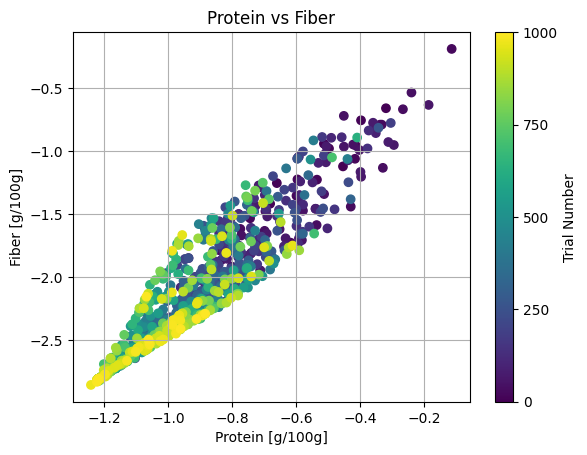

In [19]:
# パレートフロンティアの可視化部分を修正
protein = [-trial.values[0] for trial in study.trials]
fiber = [-trial.values[1] for trial in study.trials]

colors = [cm.viridis(i / n_trials) for i in range(n_trials)]

# プロットの設定
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(protein, fiber, c=colors)
ax.set_title('Protein vs Fiber')
ax.set_xlabel('Protein [g/100g]')
ax.set_ylabel('Fiber [g/100g]')
ax.grid(True)

norm = plt.Normalize(0, n_trials)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Trial Number')
cbar.set_ticks(np.linspace(0, n_trials, num=5))  # 試行数に応じた目盛り
cbar.set_ticklabels([f'{int(n_trials * 0)}', f'{int(n_trials * 0.25)}', f'{int(n_trials * 0.5)}', f'{int(n_trials * 0.75)}', f'{n_trials}'])  # 目盛りのラベル

plt.show()

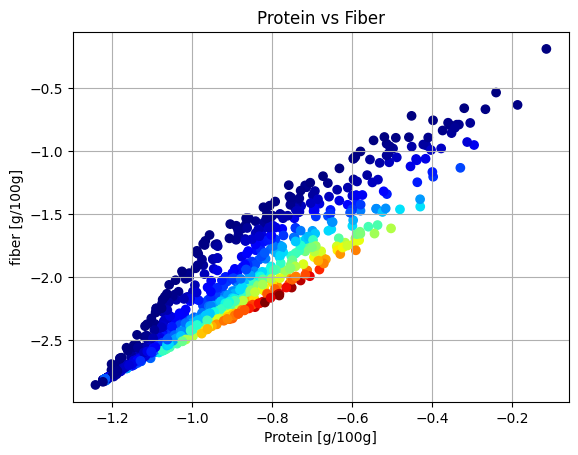

In [20]:
# 支配ランクの計算
dominance_ranks = calculate_dominance_ranks(study.trials)

# 支配ランクに基づいて色を割り当てる
colors = plt.cm.jet(dominance_ranks / np.max(dominance_ranks))

# カロリーとコストの値を取得
protein = [-trial.values[0] for trial in study.trials]
fiber = [-trial.values[1] for trial in study.trials]

# プロットの設定
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(protein, fiber, c=colors)
ax.set_title('Protein vs Fiber')
ax.set_xlabel('Protein [g/100g]')
ax.set_ylabel('fiber [g/100g]')
ax.grid(True)

plt.show()

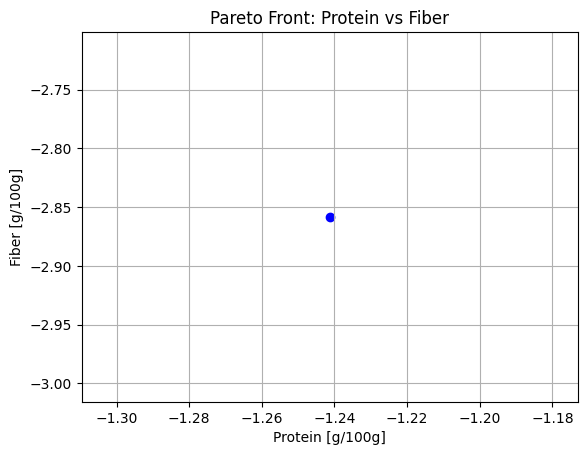

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

dominance_ranks = calculate_dominance_ranks(study.trials)
pareto_front_indices = np.where(dominance_ranks == 0)[0]
pareto_front_protein = [-study.trials[i].values[0] for i in pareto_front_indices]
pareto_front_calories = [-study.trials[i].values[1] for i in pareto_front_indices]
ax.scatter(pareto_front_protein, pareto_front_calories, color='blue')
ax.set_title('Pareto Front: Protein vs Fiber')
ax.set_xlabel('Protein [g/100g]')
ax.set_ylabel('Fiber [g/100g]')
ax.grid(True)

plt.show()